In [2]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())


,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


covid_data — данные о показателях заболеваемости за каждый день в различных регионах 187 стран. (источник данных)


Мы будем работать со следующими столбцами:

date — дата наблюдения;
province/state — наименование провинции/штата;
country — наименование страны;
confirmed — общее число зафиксированных случаев на указанный день;
deaths — общее число зафиксированных смертей на указанный день;
recovered — общее число выздоровлений на указанный день.

In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Данная таблица содержит следующие столбцы:

country — наименование страны;
date — дата наблюдения;
total_vaccinations — общее число введённых вакцин в стране на указанный день;
people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
vaccines — комбинации вакцин, используемые в стране.

In [4]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()


covid_data['date'] = pd.to_datetime(covid_data['date'])


covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']


covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

#display(covid_data['date'].min())
#display(covid_data['date'].max())

#display(vaccinations_data['date'].min())
#display(vaccinations_data['date'].max())

In [5]:
covid_df = covid_data.merge(vaccinations_data, how='left', on=['date','country'])

#display(covid_df.head())

#display(covid_df.shape)
#display(covid_df.columns)
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100


covid_data_new = covid_df.groupby(
    ['country'], 
    as_index=False
)[['death_rate', 'recover_rate']].mean()

display(covid_data_new[covid_data_new['country']=='Russia'])

,country,death_rate,recover_rate
166,Russia,1.497228,67.062735


# Базовая визуализация plot()
x — название признака, который будет отложен по оси абсцисс;
y — название признака, который будет отложен по оси ординат;
figsize — размер графика (кортеж из ширины и высоты в дюймах);
kind —тип визуализации. Основные типы:
'line' — линейный график (по умолчанию);
'bar' — столбчатая диаграмма;
'barh' — горизонтальная столбчатая диаграмма;
'hist' — гистограмма;
'box' — коробчатая диаграмма (boxplot);
'pie' — круговая диаграмма;
'scatter' — диаграмма рассеяния.
grid — отображение сетки (по умолчанию False);
legend — отображение легенды (по умолчанию False);
title — название графика;
color — цвет.

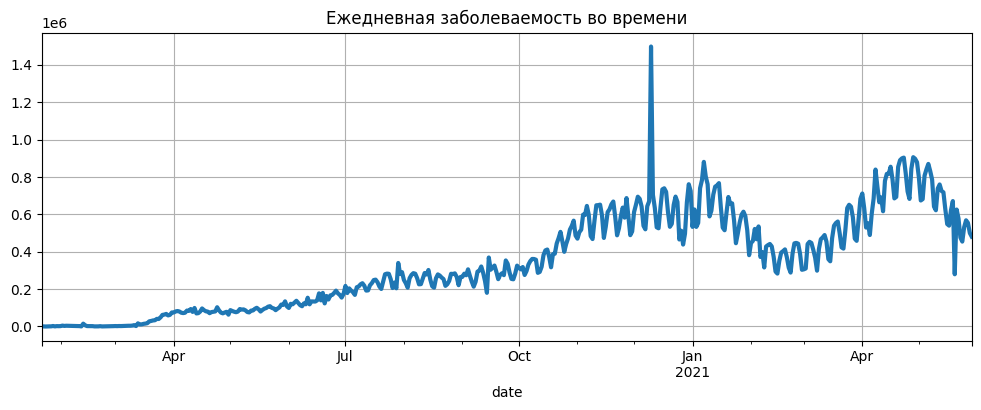

In [6]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

#Здесь и далее в модуле 
# точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке

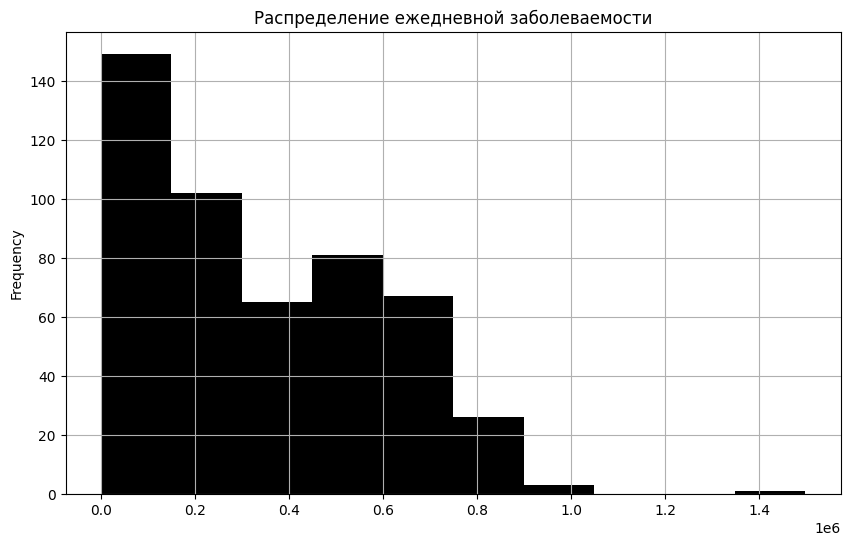

In [7]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

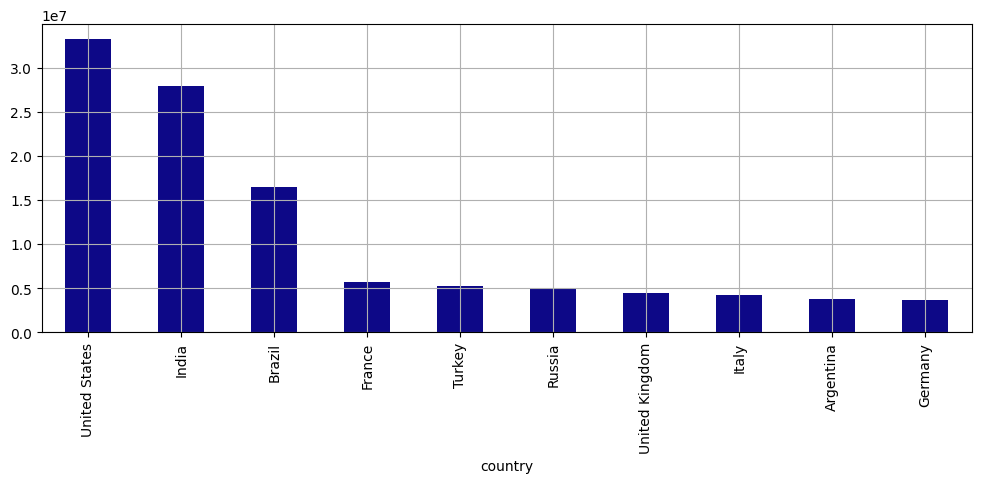

In [8]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

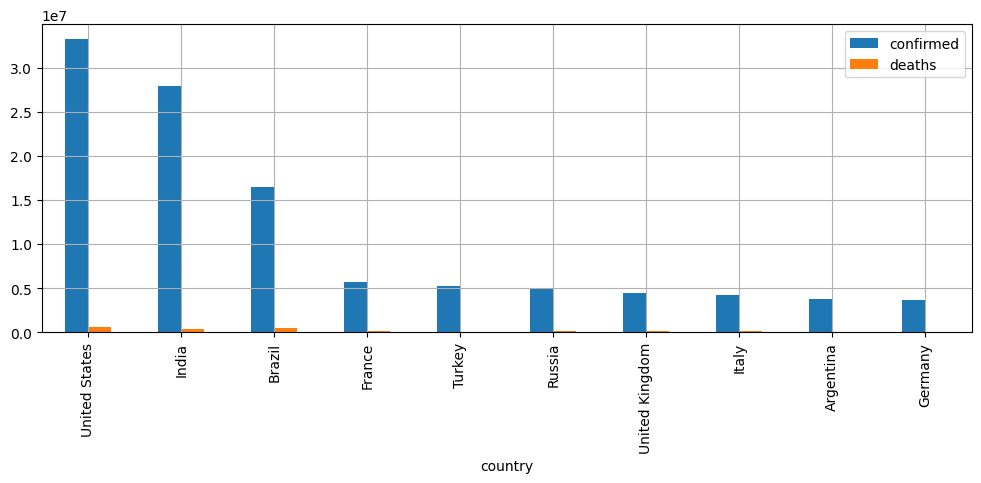

In [9]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит. \
Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах. \
Сложно (иногда и вовсе невозможно) корректировать внешний вид графика. \
Отсутствует 3D-визуализация.

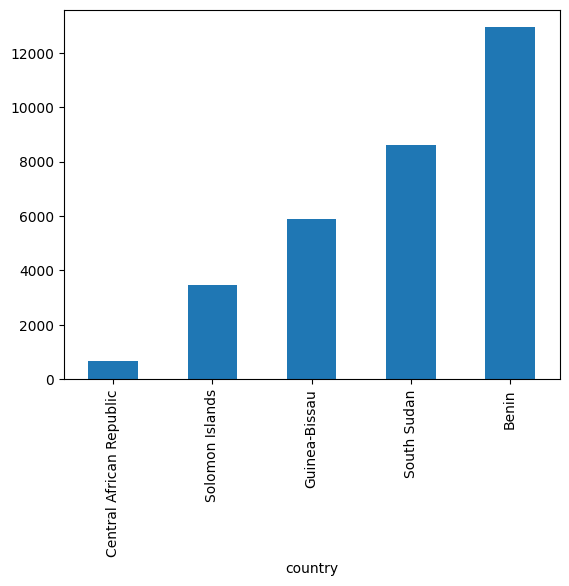

In [10]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
#более корректное отображение графиков

plt.style.use('default') #при использовании темной темы

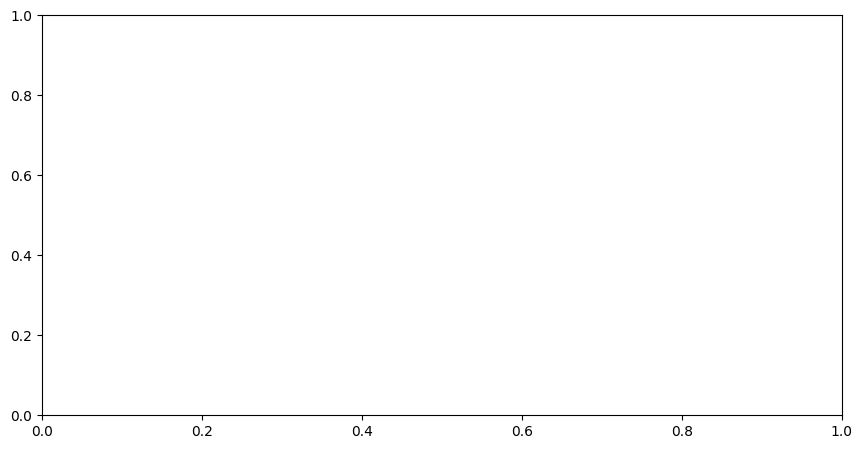

In [12]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Диаграмма рассеинвания (scatter)

x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
s — размер маркеров;
marker — вид маркеров ('o' — точки, '^' — треугольники);
c — цвет маркеров.

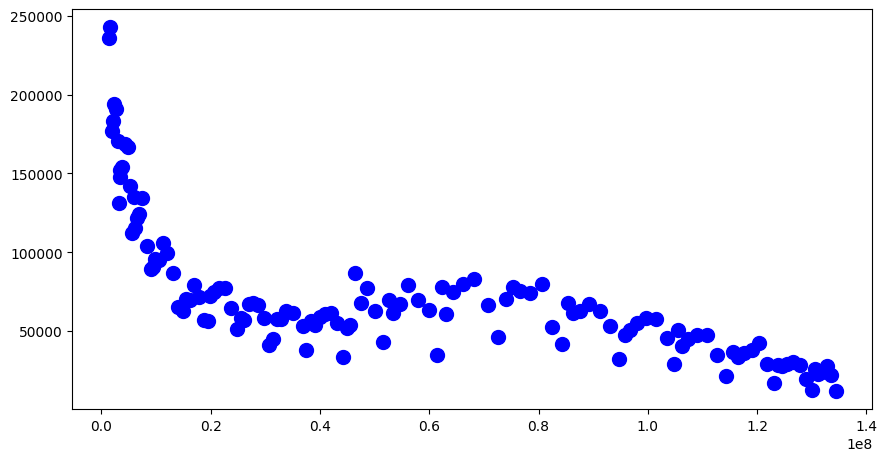

In [13]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

Круговая диаграмма (pie)

x — значения, по которым будет строиться круговая диаграмма;
labels — метки, соответствующие значениям;
autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

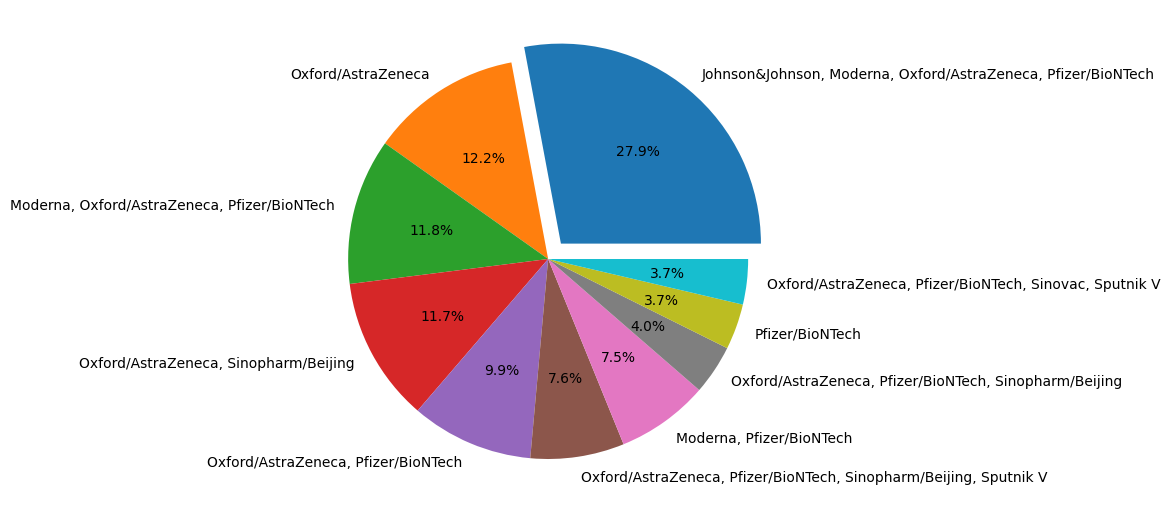

In [14]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно — вы всегда сможете подсмотреть их в документации):

axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
axes.set_xlabel() — название оси абсцисс;
axes.set_ylabel() — название оси ординат;
axes.set_xticks() — установка отметок на оси абсцисс;
axes.set_yticks() — установка отметок на оси ординат;
axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
axes.legend() — отображение легенды;
axes.grid() — установка сетки.

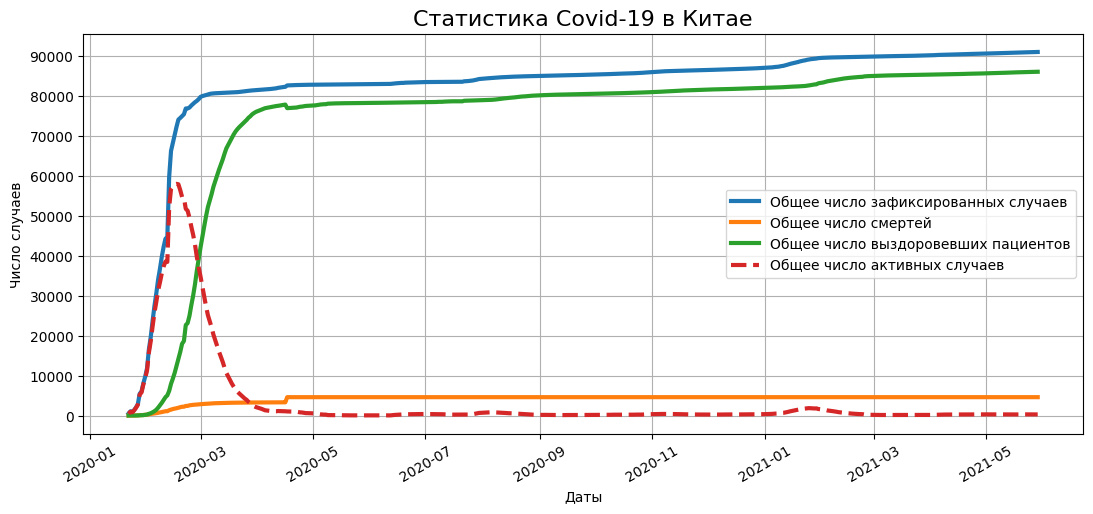

In [15]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

# Использование нескольких систем координат

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

# Основные параметры метода bar()

x — названия категорий, которые будут располагаться по оси абсцисс;
height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
width — ширина столбцов диаграммы;
color — цвет.

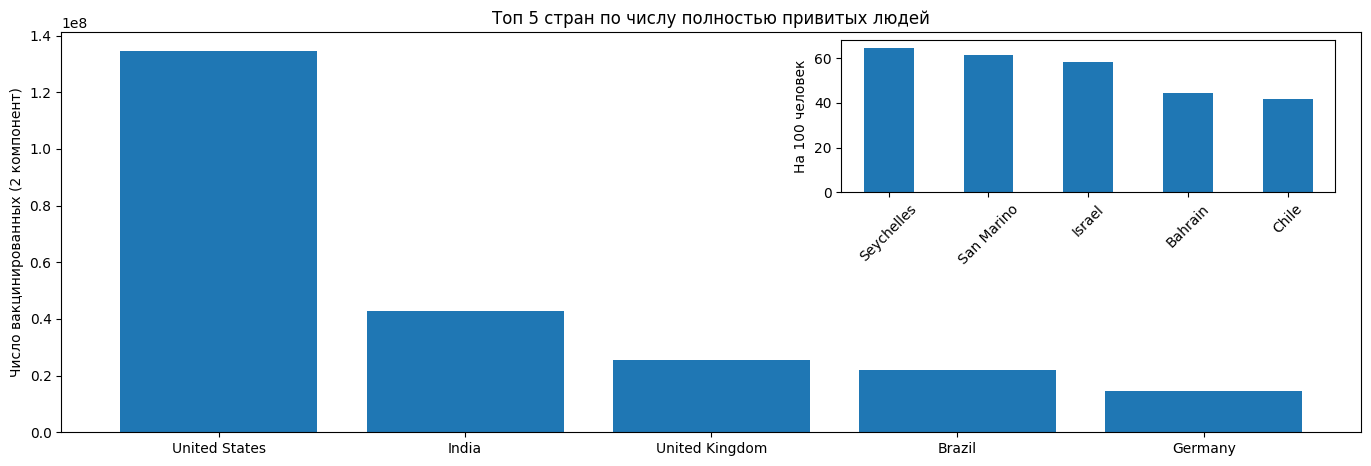

In [16]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

# Дополнительная система координат

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

nrows — число строк;
ncols — число столбцов;
figsize — общий размер фигуры в дюймах (ширина и высота).

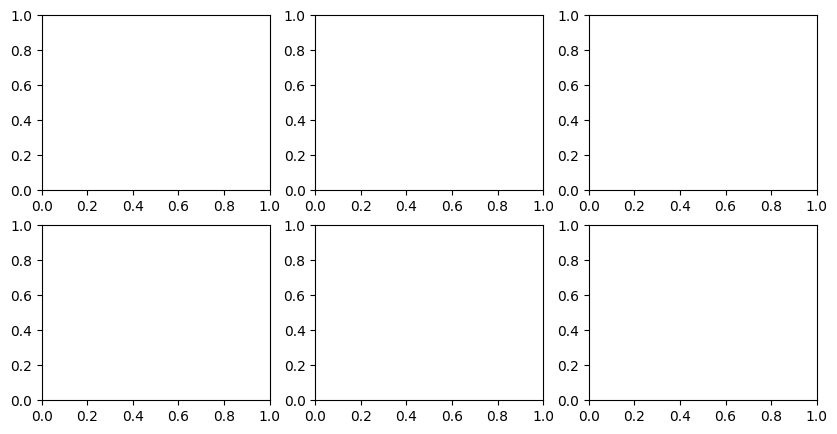

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

x — массив чисел, для которого строится гистограмма;
bins — число столбцов (корзин);
orientation — ориентация гистограммы (по умолчанию 'vertical');
color — цвет.

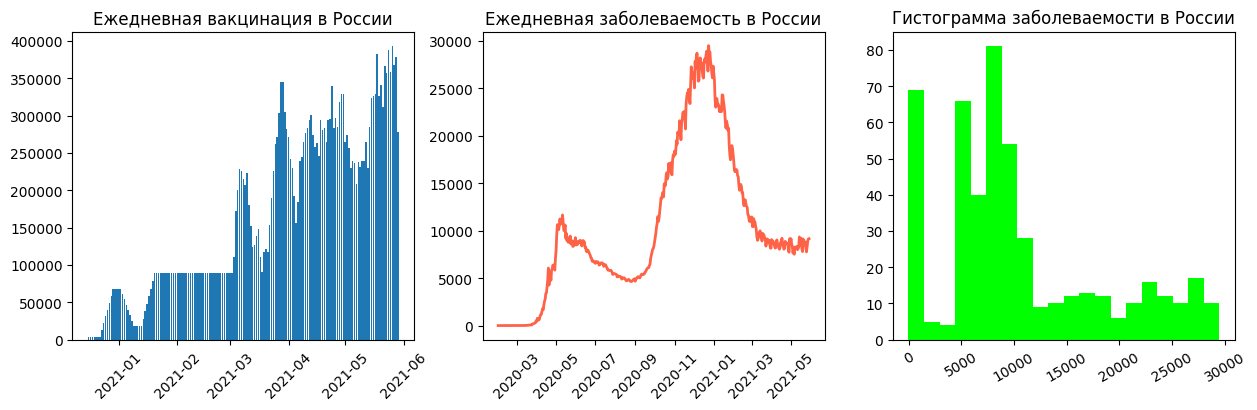

In [18]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values.

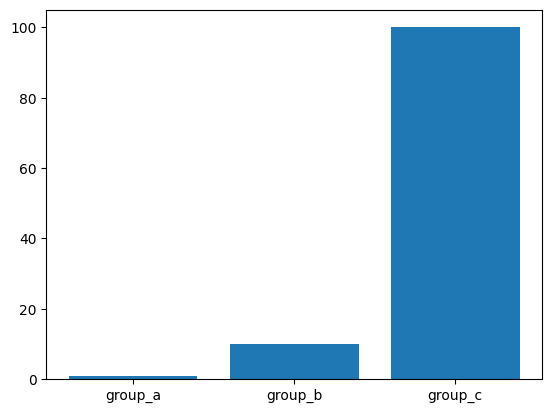

In [19]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

In [20]:
import seaborn as sns
print(sns.__version__)

0.12.1


In [21]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


# histplot()

data — DataFrame, по которому строится график;
x — признак, который будет отложен по оси абсцисс;
y — признак, который будет отложен по оси ординат;
hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
ax — система координат Matplotlib, в которой строится график;
color — цвет графика;
bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

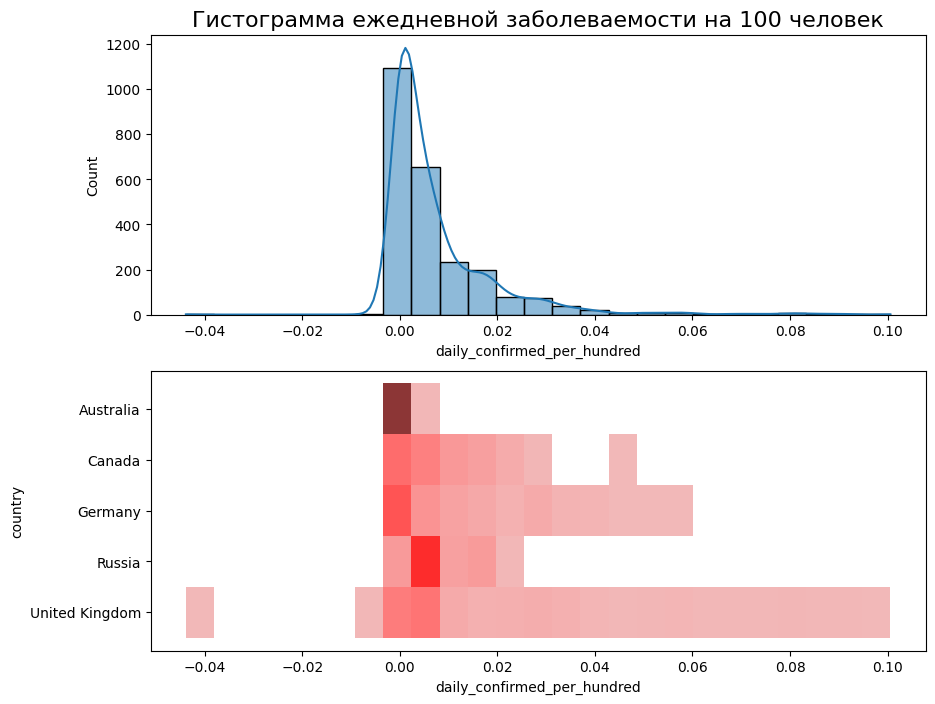

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

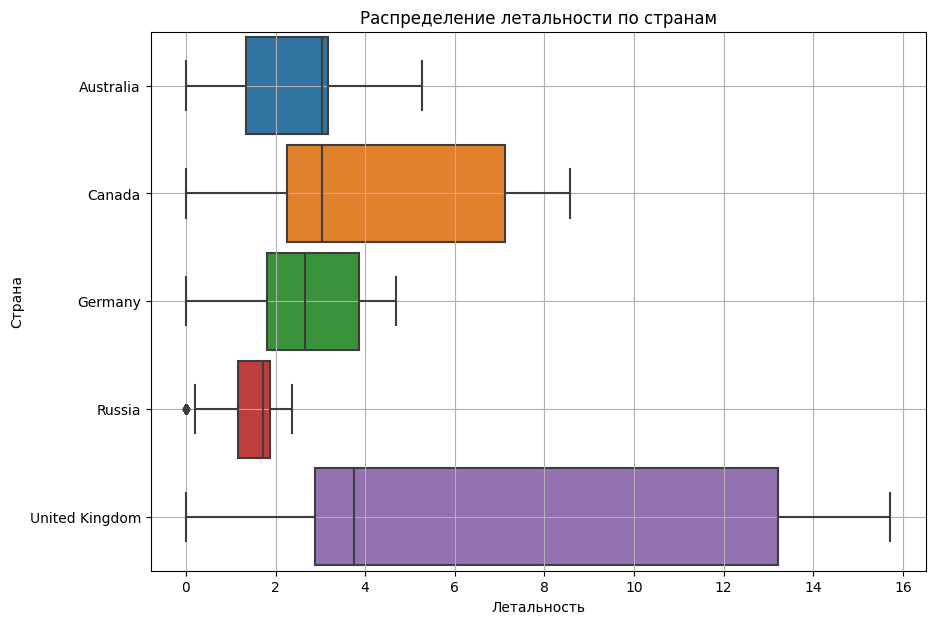

In [23]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

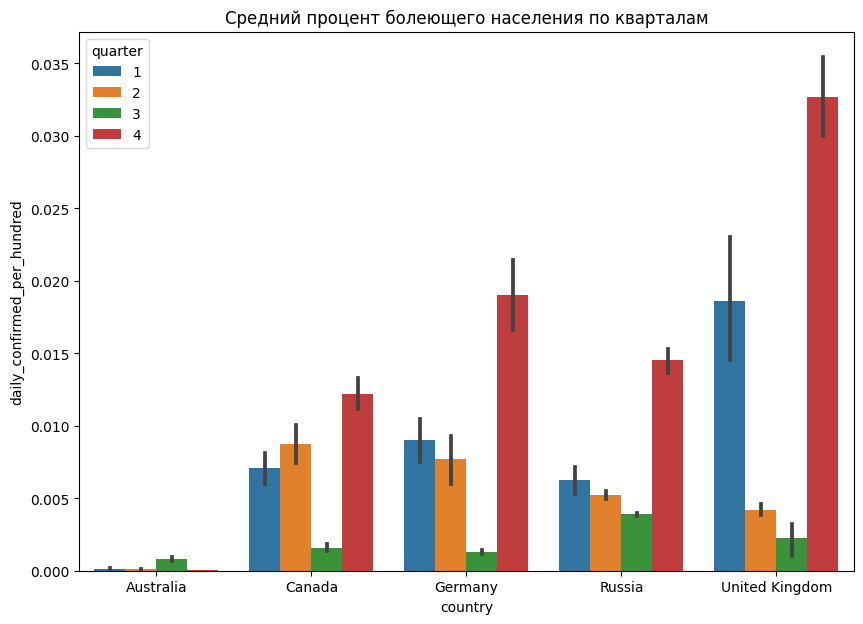

In [24]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

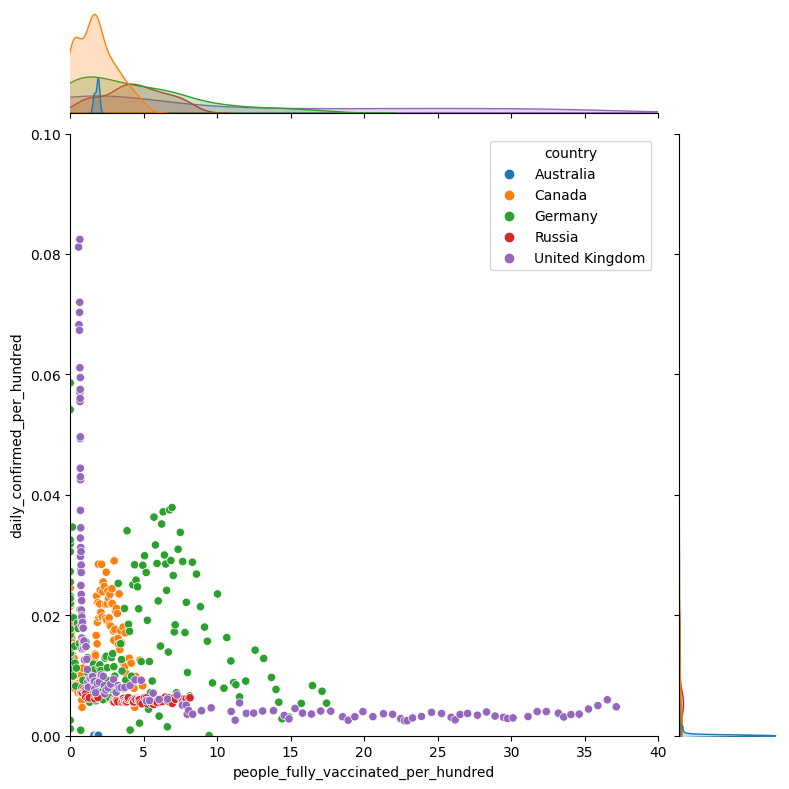

In [25]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [26]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


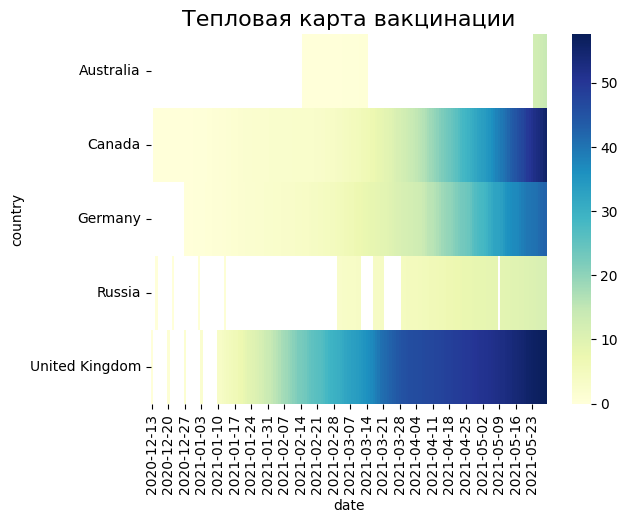

In [31]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [32]:
display(covid_df.columns)

Index(['date', 'country', 'confirmed', 'deaths', 'recovered', 'active',
       'daily_confirmed', 'daily_deaths', 'daily_recovered',
       'total_vaccinations', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines',
       'death_rate', 'recover_rate'],
      dtype='object')

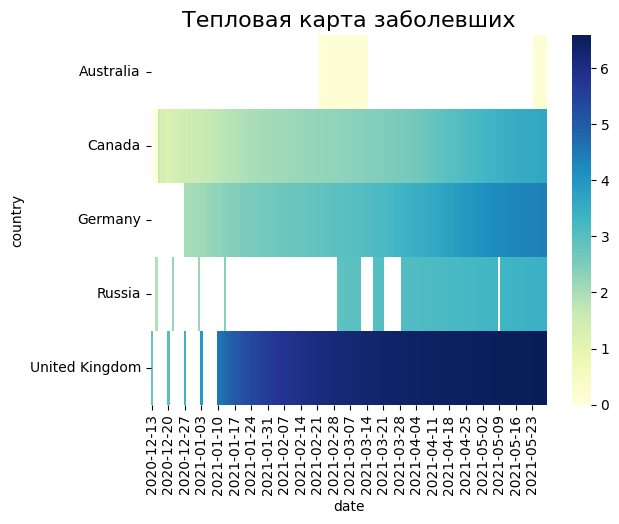

In [39]:
covid_df['confirmed_per_hundred'] = covid_df['confirmed'] / (covid_df['people_vaccinated'] * 100 / covid_df['people_vaccinated_per_hundred']) * 100

new_merge = croped_covid_df.merge(covid_df, on=['country', 'date'], how='left')

#display(new_merge.columns)

pivot_new = new_merge.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)

pivot_new.columns = pivot_new.columns.astype('string')

#display(pivot_new)
heatmap = sns.heatmap(data=pivot_new, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболевших', fontsize=16);

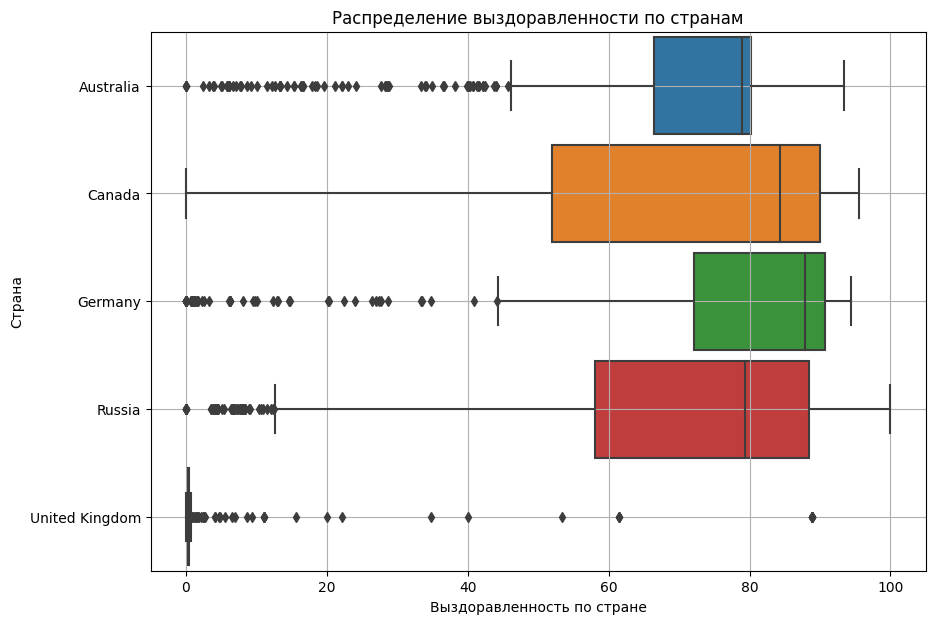

In [41]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоравленности по странам');
boxplot.set_xlabel('Выздоравленность по стране');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [40]:
display(covid_df.columns)

Index(['date', 'country', 'confirmed', 'deaths', 'recovered', 'active',
       'daily_confirmed', 'daily_deaths', 'daily_recovered',
       'total_vaccinations', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines',
       'death_rate', 'recover_rate', 'confirmed_per_hundred'],
      dtype='object')